In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import datetime as dt
from datetime import timedelta
import seaborn as sns

In [2]:
#Importing the dataset
dataset = pd.read_excel('/media/tensor/Learning/AI & Machine learning/Online Degree/BiTS Pilani/Feature Engineering/Mini Project/Food Orders - Shared-1.xlsx')

In [3]:
#Reading the dataset (top 5 rows)
dataset.head()

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,NaN,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,...,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,NaN,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,NaN,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,...,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,NaN,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,...,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,NaN,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,...,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


In [4]:
#Reading the dataset (bottom 5 rows)
dataset.tail()

,ID,Provider,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,...,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
55,456.0,NaN,5-July-2020 9.38 AM,3.0,Delivered,220,BF,5-July-2020 9.58 AM,NaN,NaN,...,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,NaN
56,48.0,NaN,5-July-2020 8.00 PM,6.0,Cancelled,330,PRO,5-July-2020 8.30 PM,NaN,NaN,...,25,20,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
57,49.0,NaN,5-July-2020 7.30 PM,4.0,Delivered,450,PRO,5-July-2020 9.05 PM,NaN,NaN,...,25,20,10,5,NaN,N,CHICKEN;BIRYANI,BING,MIX,3.0
58,50.0,NaN,5-July-2020 7.38 PM,3.0,Cancelled,250,PRO,5-July-2020 8.38 PM,NaN,NaN,...,20,20,10,5,NaN,Y,DAL;ROTI,BING,VEG,3.0
59,51.0,NaN,5-July-2020 7.38 PM,-2.0,Cancelled,250,PRO,5-July-2020 8.38 PM,NaN,NaN,...,20,20,10,5,NaN,Y,DAL;ROTI,BING,VEG,3.0


In [5]:
#Checking additional info about the dataset
dataset.info()
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58 non-null     float64
 1   Provider           0 non-null      float64
 2   DateTime           60 non-null     object 
 3   Distance           59 non-null     float64
 4   Status             59 non-null     object 
 5   Cost               60 non-null     object 
 6   PromoCode          36 non-null     object 
 7   Delivery Time      59 non-null     object 
 8   Discount           24 non-null     float64
 9   Paid amount        1 non-null      float64
 10  Payment mode       59 non-null     object 
 11  Delivery charges   60 non-null     object 
 12  Surge charges      28 non-null     object 
 13  Packaging charges  60 non-null     object 
 14  ST                 60 non-null     object 
 15  Tip                24 non-null     float64
 16  PureVeg            59 non-nu

In our Online food delivery dataset we have **21 columns(20 independent feature + 1 Target variable)** & and **60 rows of data available** for analysis of the bussiness scenerio

In [6]:
#Checking the statistical parameters of the dataset
dataset.describe()

,ID,Provider,Distance,Discount,Paid amount,Tip,Rating
count,58.000000,0.0,59.000000,24.000000,1.0,24.000000,57.000000
mean,52.655172,NaN,3.593220,33.750000,5.0,4.875000,2.403509
std,101.657587,NaN,1.340595,18.371173,NaN,0.612372,1.771396
min,1.000000,NaN,-2.000000,-25.000000,5.0,2.000000,0.000000
25%,13.250000,NaN,3.000000,25.000000,5.0,5.000000,1.000000
50%,27.500000,NaN,3.000000,25.000000,5.0,5.000000,3.000000
75%,41.750000,NaN,4.000000,50.000000,5.0,5.000000,4.000000
max,467.000000,NaN,6.000000,50.000000,5.0,5.000000,5.000000


As per the dataset information available, feature **Provider** doesn't have any value thus it can be dropped from our dataset.

##### Checking for Data Quality Issues 

In [7]:
#Dropping Provider Column
dataset1=dataset.drop(['Provider'], axis = 1, inplace = False)

In [8]:
#Checking the dataset for dropped column 
dataset1.head()

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
0,1.0,1-July-2020 8.38 PM,3.0,Delivered,300,PRO,1-July-2020 9.38 PM,50.0,NaN,COD,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,2.0
1,2.0,1-July-2020 8.38 AM,3.0,Delivered,100,BF,1-July-2020 8.58 AM,NaN,NaN,WALLET,20,NaN,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
2,3.0,1-July-2020 9.00 PM,6.0,Cancelled,250,PRO,1-July-2020 9.30 PM,25.0,NaN,CARD,25,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0
3,4.0,1-July-2020 7.30 PM,4.0,Delivered,550,PRO,1-July-2020 9.05 PM,NaN,NaN,COD,25,10,10,5,NaN,N,CHICKEN;BIRYANI,NO,MIX,1.0
4,423.0,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 7.38 PM,NaN,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0


In [9]:
#Checking for duplicate rows in the dataset
duplicate_column = dataset1[dataset1.duplicated(subset = None , keep = False)]
duplicate_column

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
5,5.0,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
11,11.0,2-July-2020 8.38 PM,3.0,Delivered,500,NaN,2-July-2020 9.38 PM,50.0,NaN,WALLET,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,4.0
15,5.0,1-July-2020 8.38 PM,3.0,Cancelled,125,PRO,1-July-2020 8.38 PM,NaN,NaN,COD,20,NaN,10,5,NaN,Y,DAL;ROTI,NO,VEG,1.0
54,11.0,2-July-2020 8.38 PM,3.0,Delivered,500,NaN,2-July-2020 9.38 PM,50.0,NaN,WALLET,20,NaN,10,5,NaN,Y,PANEER;ROTI,BING,VEG,4.0


 As per the above observation we found out that dataset has two duplicate rows. In order to reduce the redundency we can remove the duplicate rows.

In [10]:
#Dropping the duplicate rows
dataset1.drop([15,54],inplace = True,axis = 0 )  

#Checking the dtatset again for duplicate rows
dataset1[dataset1.duplicated(keep = False,subset = None)]

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating


Duplicate rows have been removed.

**Checking for missing Target labels** <br >

In [11]:
#Checking for missing data in Target Variable
dataset1.isnull().sum()


ID                    2
DateTime              0
Distance              1
Status                1
Cost                  0
PromoCode            23
Delivery Time         1
Discount             35
Paid amount          57
Payment mode          1
Delivery charges      0
Surge charges        30
Packaging charges     0
ST                    0
Tip                  34
PureVeg               1
Items                 1
Membership            1
Type                  1
Rating                3
dtype: int64


Since the target variable is Rating for our dataset , there mustn't be any missing values otherwise we would not be able to train our model.<br >
Hence we replace the **Nan** target values with the *Median*.

In [12]:
#Replacing the null values in Target Variable with the Mode of the column
dataset1['Rating'].fillna(dataset1['Rating'].median(),inplace = True)
#Checking the Target Variable again for missing values
dataset1['Rating'].isnull().sum()

0

In [13]:
#Checking for any other issues with Rating Column
dataset1.groupby(['Rating'])['ID'].count()

Rating
0.0    14
1.0     5
2.0     5
3.0    16
4.0     8
5.0     8
Name: ID, dtype: int64

There are no issue with the Rating data.

## **Other Data Integrity Checks**

### *Order time and delivery time check*<br >
As per the 'dataset.info' command to show the datatyoe and other details about each column, the datatype for Datetime & DeliveryTime are "Object" which will not support any calculation based on date and time. So we need to bring them to appropriate "Datetime" format.

In [14]:
#Changing the formats of Datetime columns
dataset1['DateTime']= pd.to_datetime(dataset1['DateTime'], format = '%d-%B-%Y %I.%M %p')
dataset1['Delivery Time']= pd.to_datetime(dataset1['Delivery Time'], format = '%d-%B-%Y %I.%M %p')
#Checking for changed datatype
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 59
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 56 non-null     float64       
 1   DateTime           58 non-null     datetime64[ns]
 2   Distance           57 non-null     float64       
 3   Status             57 non-null     object        
 4   Cost               58 non-null     object        
 5   PromoCode          35 non-null     object        
 6   Delivery Time      57 non-null     datetime64[ns]
 7   Discount           23 non-null     float64       
 8   Paid amount        1 non-null      float64       
 9   Payment mode       57 non-null     object        
 10  Delivery charges   58 non-null     object        
 11  Surge charges      28 non-null     object        
 12  Packaging charges  58 non-null     object        
 13  ST                 58 non-null     object        
 14  Tip         

In [15]:
#Checking "DateTime" & " DeliveryTime" for conceptually possible value

dataset1.groupby(dataset1['Delivery Time']-dataset1['DateTime'])['ID'].count()

-1 days +23:00:00     2
0 days 00:00:00       3
0 days 00:20:00      12
0 days 00:30:00       6
0 days 01:00:00      19
0 days 01:30:00       4
0 days 01:35:00      10
Name: ID, dtype: int64

In [16]:
#Checking for Wrong DateTime entries
wrong_datetime =dataset1[['DateTime','Delivery Time']].loc[(dataset1['Delivery Time']<dataset1['DateTime'])]
wrong_datetime

,DateTime,Delivery Time
4,2020-07-01 20:38:00,2020-07-01 19:38:00
35,2020-07-04 20:38:00,2020-07-04 19:38:00


In [17]:
dataset1.drop([4,35],inplace = True,axis = 0 )    # Removing the rows with wrong data

In [18]:
#Checking again for Wrong DateTime entries
dataset1.groupby(dataset1['Delivery Time']-dataset1['DateTime'])['ID'].count()

0 days 00:00:00     3
0 days 00:20:00    12
0 days 00:30:00     6
0 days 01:00:00    19
0 days 01:30:00     4
0 days 01:35:00    10
Name: ID, dtype: int64

Data-integrity issues with columns "DateTime" & "Delivery Time" has been removed

In [19]:
#Checking the Distance Column
dataset1.groupby(['Distance'])['ID'].count()

Distance
-2.0     1
 3.0    33
 4.0    10
 6.0    10
Name: ID, dtype: int64

We can see one of the numbers in Distance column is negative which is not feasible, so we will be replacing it with the median value of the column

In [20]:
#Replacing the Distance column with its median value 
Distance_median = dataset1.Distance.median()
print(Distance_median)
dataset1['Distance'].replace(-2,(Distance_median),inplace=True)
#Checking for the replacement
dataset1.groupby(['Distance'])['ID'].count()

3.0


Distance
3.0    34
4.0    10
6.0    10
Name: ID, dtype: int64

Replacement with Median has been completed

### Missing values in Other Variables

In [21]:
dataset1.isnull().sum()

ID                    2
DateTime              0
Distance              1
Status                1
Cost                  0
PromoCode            22
Delivery Time         1
Discount             34
Paid amount          55
Payment mode          1
Delivery charges      0
Surge charges        28
Packaging charges     0
ST                    0
Tip                  32
PureVeg               1
Items                 1
Membership            1
Type                  1
Rating                0
dtype: int64

In [22]:
# Replacing missing/Null values in ID Column with a random number

miss_val = dataset1['ID'].isnull().sum()  # 2

# Replacing missing Value of ID column with unique feature

while miss_val>0:
    
    n = random.randint(0,500)
    
    for j in range(len(dataset1['ID'].unique())):
        if n == dataset1['ID'].iloc[j]:
            break
        else:
            dataset1['ID'].fillna(n,inplace = True)
            miss_val = miss_val-1
        

In [23]:
#Checking again for null value repacement
dataset1['ID'].isnull().sum()

0

In [24]:
# Replacing remaining missing values in other columns

dataset1['Discount'].fillna(0,inplace = True)
dataset1['Delivery charges'].fillna(0,inplace = True)
dataset1['Surge charges'].fillna(0,inplace = True)
dataset1['Packaging charges'].fillna(0,inplace = True)
dataset1['Tip'].fillna(0,inplace = True)
dataset1['Discount'].fillna(0,inplace = True)


# Replacing missing value with new Promocode : No_coupon
dataset1['PromoCode'].fillna('No_coupon',inplace = True)


In [25]:
#Checking for null values after the required replacements
dataset1.isnull().sum()

ID                    0
DateTime              0
Distance              1
Status                1
Cost                  0
PromoCode             0
Delivery Time         1
Discount              0
Paid amount          55
Payment mode          1
Delivery charges      0
Surge charges         0
Packaging charges     0
ST                    0
Tip                   0
PureVeg               1
Items                 1
Membership            1
Type                  1
Rating                0
dtype: int64

Many Feature columns in the dataset are having inappropriate datatype:<br >               
5   Cost                    object <br >
11  Delivery charges        object <br >
12  Surge charges           object <br >
13  Packaging charges       object <br >
14  ST                      object <br >


Datatype for the above columns must be changed to *float64* type.

In [26]:
#For each line of the below code, we are getting unusual error in **row 23(position :22)**. Lets check the specific row.
#dataset1['Cost']= pd.to_numeric(dataset1['Cost'])
#dataset1['Delivery charges']= pd.to_numeric(dataset1['Delivery charges'])
#dataset1['Surge charges']= pd.to_numeric(dataset1['Surge charges'])
#dataset1['Packaging charges']= pd.to_numeric(dataset1['Packaging charges'])
#dataset1['ST']= pd.to_numeric(dataset1['ST'])

For the each line of the above code, we are getting unusual error in **row 23(position :22)**. Lets check the that specific row.

In [27]:
#Checking the row 23 for the error
dataset1.loc[[23]]

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
23,231.0,2020-07-03 20:38:00,NaN,NaN,COD,20,NaT,10.0,5.0,NaN,Y,DAL;ROTI,NO,VEG,2.0,NaN,NaN,NaN,NaN,3.0


In [28]:
#Dropping row 23 as the data doesn't look appropriate
dataset1.drop([23],inplace = True,axis = 0 )

In [29]:
#Changing the datatype of each of the above column
dataset1['Cost']= pd.to_numeric(dataset1['Cost'])
dataset1['Delivery charges']= pd.to_numeric(dataset1['Delivery charges'])
dataset1['Surge charges']= pd.to_numeric(dataset1['Surge charges'])
dataset1['Packaging charges']= pd.to_numeric(dataset1['Packaging charges'])
dataset1['ST']= pd.to_numeric(dataset1['ST'])

In [30]:
#Checking for the correct datatypes
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 59
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 55 non-null     float64       
 1   DateTime           55 non-null     datetime64[ns]
 2   Distance           55 non-null     float64       
 3   Status             55 non-null     object        
 4   Cost               55 non-null     int64         
 5   PromoCode          55 non-null     object        
 6   Delivery Time      55 non-null     datetime64[ns]
 7   Discount           55 non-null     float64       
 8   Paid amount        0 non-null      float64       
 9   Payment mode       55 non-null     object        
 10  Delivery charges   55 non-null     int64         
 11  Surge charges      55 non-null     int64         
 12  Packaging charges  55 non-null     int64         
 13  ST                 55 non-null     int64         
 14  Tip         


<br ><br >
<br >
# Data Transformation

When you deliver goods, packages, documents, etc. on time, you are being punctual and professional. Professionals keep deadlines, end of story. Customers and clients can be very upset with you and you could potentially lose income when your patrons lose faith in you. <br >
In online food delivery segment time becomes much more crucial as the deliverable items starts loosing its freshness once its ready to deliver. <br >
Hence,customer satisfaction be judged based on the **time taken to deliver Food**.<br >
<br >
Here we can introduce new feature "*Time_Taken*".

In [31]:
#Deriving new column from "DeliveryTime" and "DateTime" columns Time
dataset1['Time_Taken']=dataset1['Delivery Time']-dataset1['DateTime']

dataset1.groupby(['Time_Taken'])['ID'].count()

Time_Taken
0 days 00:00:00     3
0 days 00:20:00    13
0 days 00:30:00     6
0 days 01:00:00    19
0 days 01:30:00     4
0 days 01:35:00    10
Name: ID, dtype: int64

Here we created a new feature but we need to change it into minutes for better data handling.


In [32]:
#Converting Time_Taken to minutes
dataset1['Time_Taken']= dataset1['Time_Taken'].dt.total_seconds()/60.0
dataset1.head()

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,Time_Taken
0,1.0,2020-07-01 20:38:00,3.0,Delivered,300,PRO,2020-07-01 21:38:00,50.0,NaN,COD,...,0,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2.0,60.0
1,2.0,2020-07-01 08:38:00,3.0,Delivered,100,BF,2020-07-01 08:58:00,0.0,NaN,WALLET,...,0,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0
2,3.0,2020-07-01 21:00:00,6.0,Cancelled,250,PRO,2020-07-01 21:30:00,25.0,NaN,CARD,...,10,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0,30.0
3,4.0,2020-07-01 19:30:00,4.0,Delivered,550,PRO,2020-07-01 21:05:00,0.0,NaN,COD,...,10,10,5,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0,95.0
5,5.0,2020-07-01 20:38:00,3.0,Cancelled,125,PRO,2020-07-01 20:38:00,0.0,NaN,COD,...,0,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0,0.0


In [33]:
#Deriving Column "Amount" based on different charges
dataset1['Amount'] = dataset1['Cost'] - dataset1['Discount'] + dataset1['Delivery charges'] + dataset1['Surge charges'] + dataset1['Packaging charges'] + dataset1['ST']+dataset1['Tip']

In [34]:
#Checking for all derived variables
dataset1.head()

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,Time_Taken,Amount
0,1.0,2020-07-01 20:38:00,3.0,Delivered,300,PRO,2020-07-01 21:38:00,50.0,NaN,COD,...,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2.0,60.0,285.0
1,2.0,2020-07-01 08:38:00,3.0,Delivered,100,BF,2020-07-01 08:58:00,0.0,NaN,WALLET,...,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0,140.0
2,3.0,2020-07-01 21:00:00,6.0,Cancelled,250,PRO,2020-07-01 21:30:00,25.0,NaN,CARD,...,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0,30.0,280.0
3,4.0,2020-07-01 19:30:00,4.0,Delivered,550,PRO,2020-07-01 21:05:00,0.0,NaN,COD,...,10,5,0.0,N,CHICKEN;BIRYANI,NO,MIX,1.0,95.0,600.0
5,5.0,2020-07-01 20:38:00,3.0,Cancelled,125,PRO,2020-07-01 20:38:00,0.0,NaN,COD,...,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0,0.0,160.0


### Order type - veg / nonveg / mix from Items

In [35]:
#Checking various categories in "Item" column
dataset1.groupby(['Items'])['ID'].count()

Items
CHICKEN;BIRYANI     10
DAL;CHICKEN;ROTI    13
DAL;ROTI            11
MIXVEG;RICE         10
PANEER;ROTI         11
Name: ID, dtype: int64

In [36]:
#Checking various entries in "Type" Column
dataset1.groupby(['Type'])['ID'].count()

Type
MIX    23
VEG    32
Name: ID, dtype: int64

As we observe the order type and corresponding Items we can see that there could be one more Type in food catagory: <br >
Non-veg : CHICKEN;BIRYANI <br >

Creating more specific catagory might help us to make better analytical decisioin.

In [37]:
#Creating new Order "Type" as "Non-Veg"
column_number1 =dataset1.columns.get_loc('Items')
column_number2 =dataset1.columns.get_loc('Type')

for i in range(dataset1['ID'].count()):
    
    if (dataset1.iloc[i,column_number1]== 'CHICKEN;BIRYANI'):
         dataset1.iloc[i,column_number2]= 'Non-Veg'

In [38]:
#Checking new Order "Type"
dataset1.groupby(['Type'])['ID'].count()

Type
MIX        13
Non-Veg    10
VEG        32
Name: ID, dtype: int64

### *Converting Status to binary 0 /1*

In [39]:
#Binary conversion for column "Status"
dataset1['Status'].replace(['Delivered','Cancelled'], [1,0],inplace = True)
dataset1.head()

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,Time_Taken,Amount
0,1.0,2020-07-01 20:38:00,3.0,1,300,PRO,2020-07-01 21:38:00,50.0,NaN,COD,...,10,5,0.0,Y,PANEER;ROTI,BING,VEG,2.0,60.0,285.0
1,2.0,2020-07-01 08:38:00,3.0,1,100,BF,2020-07-01 08:58:00,0.0,NaN,WALLET,...,10,5,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0,140.0
2,3.0,2020-07-01 21:00:00,6.0,0,250,PRO,2020-07-01 21:30:00,25.0,NaN,CARD,...,10,5,5.0,Y,MIXVEG;RICE,BING,VEG,0.0,30.0,280.0
3,4.0,2020-07-01 19:30:00,4.0,1,550,PRO,2020-07-01 21:05:00,0.0,NaN,COD,...,10,5,0.0,N,CHICKEN;BIRYANI,NO,Non-Veg,1.0,95.0,600.0
5,5.0,2020-07-01 20:38:00,3.0,0,125,PRO,2020-07-01 20:38:00,0.0,NaN,COD,...,10,5,0.0,Y,DAL;ROTI,NO,VEG,1.0,0.0,160.0


In [40]:
# Comparision of Feature 'PureVeg' & 'Type'

dataset1[['PureVeg','Type']]

,PureVeg,Type
0,Y,VEG
1,N,MIX
2,Y,VEG
3,N,Non-Veg
5,Y,VEG
6,Y,VEG
7,N,MIX
8,Y,VEG
9,N,Non-Veg
10,Y,VEG


All the information(Veg or not) provided by the Feature *PureVeg* are already present in feature 'Type' , hence no point in keeping both in our dataset. 


In [41]:
#Drop the feature 'PureVeg'

dataset2=dataset1.drop(['PureVeg'],inplace=False,axis=1)
dataset2.head()

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,Time_Taken,Amount
0,1.0,2020-07-01 20:38:00,3.0,1,300,PRO,2020-07-01 21:38:00,50.0,NaN,COD,...,0,10,5,0.0,PANEER;ROTI,BING,VEG,2.0,60.0,285.0
1,2.0,2020-07-01 08:38:00,3.0,1,100,BF,2020-07-01 08:58:00,0.0,NaN,WALLET,...,0,10,5,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0,140.0
2,3.0,2020-07-01 21:00:00,6.0,0,250,PRO,2020-07-01 21:30:00,25.0,NaN,CARD,...,10,10,5,5.0,MIXVEG;RICE,BING,VEG,0.0,30.0,280.0
3,4.0,2020-07-01 19:30:00,4.0,1,550,PRO,2020-07-01 21:05:00,0.0,NaN,COD,...,10,10,5,0.0,CHICKEN;BIRYANI,NO,Non-Veg,1.0,95.0,600.0
5,5.0,2020-07-01 20:38:00,3.0,0,125,PRO,2020-07-01 20:38:00,0.0,NaN,COD,...,0,10,5,0.0,DAL;ROTI,NO,VEG,1.0,0.0,160.0


In [42]:
#Checking for the removed column
dataset2.head(55)

,ID,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,...,Surge charges,Packaging charges,ST,Tip,Items,Membership,Type,Rating,Time_Taken,Amount
0,1.0,2020-07-01 20:38:00,3.0,1,300,PRO,2020-07-01 21:38:00,50.0,NaN,COD,...,0,10,5,0.0,PANEER;ROTI,BING,VEG,2.0,60.0,285.0
1,2.0,2020-07-01 08:38:00,3.0,1,100,BF,2020-07-01 08:58:00,0.0,NaN,WALLET,...,0,10,5,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0,140.0
2,3.0,2020-07-01 21:00:00,6.0,0,250,PRO,2020-07-01 21:30:00,25.0,NaN,CARD,...,10,10,5,5.0,MIXVEG;RICE,BING,VEG,0.0,30.0,280.0
3,4.0,2020-07-01 19:30:00,4.0,1,550,PRO,2020-07-01 21:05:00,0.0,NaN,COD,...,10,10,5,0.0,CHICKEN;BIRYANI,NO,Non-Veg,1.0,95.0,600.0
5,5.0,2020-07-01 20:38:00,3.0,0,125,PRO,2020-07-01 20:38:00,0.0,NaN,COD,...,0,10,5,0.0,DAL;ROTI,NO,VEG,1.0,0.0,160.0
6,6.0,2020-07-01 19:38:00,3.0,1,280,PRO,2020-07-01 20:38:00,50.0,NaN,COD,...,0,10,5,0.0,PANEER;ROTI,BING,VEG,2.0,60.0,265.0
7,7.0,2020-07-01 09:38:00,3.0,1,120,BF,2020-07-01 09:58:00,0.0,NaN,WALLET,...,0,10,5,5.0,DAL;CHICKEN;ROTI,BONG,MIX,4.0,20.0,160.0
8,8.0,2020-07-01 20:00:00,6.0,0,230,PRO,2020-07-01 20:30:00,25.0,NaN,CARD,...,10,10,5,5.0,MIXVEG;RICE,BING,VEG,0.0,30.0,260.0
9,9.0,2020-07-01 19:30:00,4.0,1,450,PRO,2020-07-01 21:05:00,0.0,NaN,COD,...,10,10,5,0.0,CHICKEN;BIRYANI,NO,Non-Veg,1.0,95.0,500.0
10,10.0,2020-07-01 19:38:00,3.0,0,150,PRO,2020-07-01 20:38:00,0.0,NaN,COD,...,0,10,5,0.0,DAL;ROTI,NO,VEG,1.0,60.0,185.0


### Creation of dummy variable for some catagorical values

In [43]:
#Creating dummy variables for Categorical columns
dataset3 =pd.get_dummies(dataset2,columns = ['Membership','Payment mode','Type','PromoCode'])
dataset3.head()

,ID,DateTime,Distance,Status,Cost,Delivery Time,Discount,Paid amount,Delivery charges,Surge charges,...,Membership_NO,Payment mode_CARD,Payment mode_COD,Payment mode_WALLET,Type_MIX,Type_Non-Veg,Type_VEG,PromoCode_BF,PromoCode_No_coupon,PromoCode_PRO
0,1.0,2020-07-01 20:38:00,3.0,1,300,2020-07-01 21:38:00,50.0,NaN,20,0,...,0,0,1,0,0,0,1,0,0,1
1,2.0,2020-07-01 08:38:00,3.0,1,100,2020-07-01 08:58:00,0.0,NaN,20,0,...,0,0,0,1,1,0,0,1,0,0
2,3.0,2020-07-01 21:00:00,6.0,0,250,2020-07-01 21:30:00,25.0,NaN,25,10,...,0,1,0,0,0,0,1,0,0,1
3,4.0,2020-07-01 19:30:00,4.0,1,550,2020-07-01 21:05:00,0.0,NaN,25,10,...,1,0,1,0,0,1,0,0,0,1
5,5.0,2020-07-01 20:38:00,3.0,0,125,2020-07-01 20:38:00,0.0,NaN,20,0,...,1,0,1,0,0,0,1,0,0,1


##### Dummy Variable Trap: When the number of dummy variables created is equal to the number of values the categorical value can take on. This leads to multicollinearity, which causes incorrect calculations of regression coefficients and p-values.

In [44]:
#Removing one of the dummy columns for each categorical feature to avoid "Dummy Trap" 
dataset3.drop(['Membership_NO','Payment mode_WALLET','Type_MIX','PromoCode_No_coupon'],inplace = True,axis = 1 )  
dataset3.head()

,ID,DateTime,Distance,Status,Cost,Delivery Time,Discount,Paid amount,Delivery charges,Surge charges,...,Time_Taken,Amount,Membership_BING,Membership_BONG,Payment mode_CARD,Payment mode_COD,Type_Non-Veg,Type_VEG,PromoCode_BF,PromoCode_PRO
0,1.0,2020-07-01 20:38:00,3.0,1,300,2020-07-01 21:38:00,50.0,NaN,20,0,...,60.0,285.0,1,0,0,1,0,1,0,1
1,2.0,2020-07-01 08:38:00,3.0,1,100,2020-07-01 08:58:00,0.0,NaN,20,0,...,20.0,140.0,0,1,0,0,0,0,1,0
2,3.0,2020-07-01 21:00:00,6.0,0,250,2020-07-01 21:30:00,25.0,NaN,25,10,...,30.0,280.0,1,0,1,0,0,1,0,1
3,4.0,2020-07-01 19:30:00,4.0,1,550,2020-07-01 21:05:00,0.0,NaN,25,10,...,95.0,600.0,0,0,0,1,1,0,0,1
5,5.0,2020-07-01 20:38:00,3.0,0,125,2020-07-01 20:38:00,0.0,NaN,20,0,...,0.0,160.0,0,0,0,1,0,1,0,1


<br > 
Apart from above 3 variables some other feature columns should also be removed which as below:<br > 
    
    "ID" : Its just an order tracking number 
    "Paid amount: All values are Nan"
    "DateTime" & Delivery Time  : New Feature column 'DeliveryTime' has been created for better analysis
    "Items" : Relevent information already comprised in 'OrderType'" 
    

In [45]:
#Removing the above mentioned columns
dataset4 = dataset3.drop(['Paid amount','ID','DateTime','Items','Delivery Time'],inplace= False, axis = 1 ) 
dataset4.head()
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 59
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance           55 non-null     float64
 1   Status             55 non-null     int64  
 2   Cost               55 non-null     int64  
 3   Discount           55 non-null     float64
 4   Delivery charges   55 non-null     int64  
 5   Surge charges      55 non-null     int64  
 6   Packaging charges  55 non-null     int64  
 7   ST                 55 non-null     int64  
 8   Tip                55 non-null     float64
 9   Rating             55 non-null     float64
 10  Time_Taken         55 non-null     float64
 11  Amount             55 non-null     float64
 12  Membership_BING    55 non-null     uint8  
 13  Membership_BONG    55 non-null     uint8  
 14  Payment mode_CARD  55 non-null     uint8  
 15  Payment mode_COD   55 non-null     uint8  
 16  Type_Non-Veg       55 non-nu

### **Data Normalization**



In [46]:
#Importing required libraries
from sklearn.preprocessing import MinMaxScaler

In [47]:
#Creating object of MinMaxScalar Class
scaling = MinMaxScaler()

In [48]:
#Listing Numerical Columns for transformation
A =['Distance','Cost','Delivery charges','Discount','Surge charges','Packaging charges','ST','Tip','Time_Taken','Amount']
#Transforming numerical columns
dataset4[A] =scaling.fit_transform(dataset4[A])

<br ><br ><br ><br >
# EDA 

### Univariate Analysis

In [49]:
#Checking dataset
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 59
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance           55 non-null     float64
 1   Status             55 non-null     int64  
 2   Cost               55 non-null     float64
 3   Discount           55 non-null     float64
 4   Delivery charges   55 non-null     float64
 5   Surge charges      55 non-null     float64
 6   Packaging charges  55 non-null     float64
 7   ST                 55 non-null     float64
 8   Tip                55 non-null     float64
 9   Rating             55 non-null     float64
 10  Time_Taken         55 non-null     float64
 11  Amount             55 non-null     float64
 12  Membership_BING    55 non-null     uint8  
 13  Membership_BONG    55 non-null     uint8  
 14  Payment mode_CARD  55 non-null     uint8  
 15  Payment mode_COD   55 non-null     uint8  
 16  Type_Non-Veg       55 non-nu

In [50]:
#List of Numerical Variables
numerical_feature = ['Distance','Cost','Discount','Delivery charges','Surge charges','Packaging charges','ST','Tip','Time_Taken','Amount']
n = len(numerical_feature)
print(n)

10


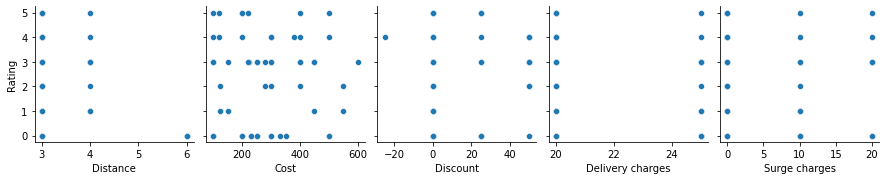

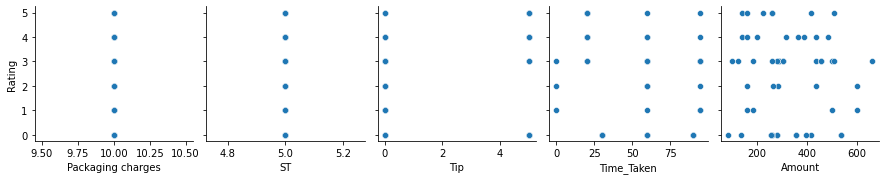

In [51]:
#Pairplot with Numerical Variables (Showing Relationship between Target and numerical predictor) 
numerical_feature1 = numerical_feature[0:int(n/2)]
numerical_feature2 = numerical_feature[int(n/2):n]

%matplotlib inline

graphs = sns.pairplot(dataset1,y_vars = 'Rating',x_vars =numerical_feature1)

graphs = sns.pairplot(dataset1,y_vars = 'Rating',x_vars =numerical_feature2)
plt.show()

As observed form the abovegraphs, Features **Packaging charges** & **ST** are not varying wth the change in output variable i.e **Rating**. So it can be dropped from the dataset.


In [52]:
# Dropping features 'Delivery charges' & 'ST'
dataset4.drop(['Packaging charges','ST'],axis = 1, inplace = True)
numerical_feature.remove('Packaging charges')
numerical_feature.remove('ST')
#Checking for dropped columns
dataset4.head(2)

,Distance,Status,Cost,Discount,Delivery charges,Surge charges,Tip,Rating,Time_Taken,Amount,Membership_BING,Membership_BONG,Payment mode_CARD,Payment mode_COD,Type_Non-Veg,Type_VEG,PromoCode_BF,PromoCode_PRO
0,0.0,1,0.4,1.000000,0.0,0.0,0.0,2.0,0.631579,0.347826,1,0,0,1,0,1,0,1
1,0.0,1,0.0,0.333333,0.0,0.0,1.0,4.0,0.210526,0.095652,0,1,0,0,0,0,1,0


### Correlation Heatmap 

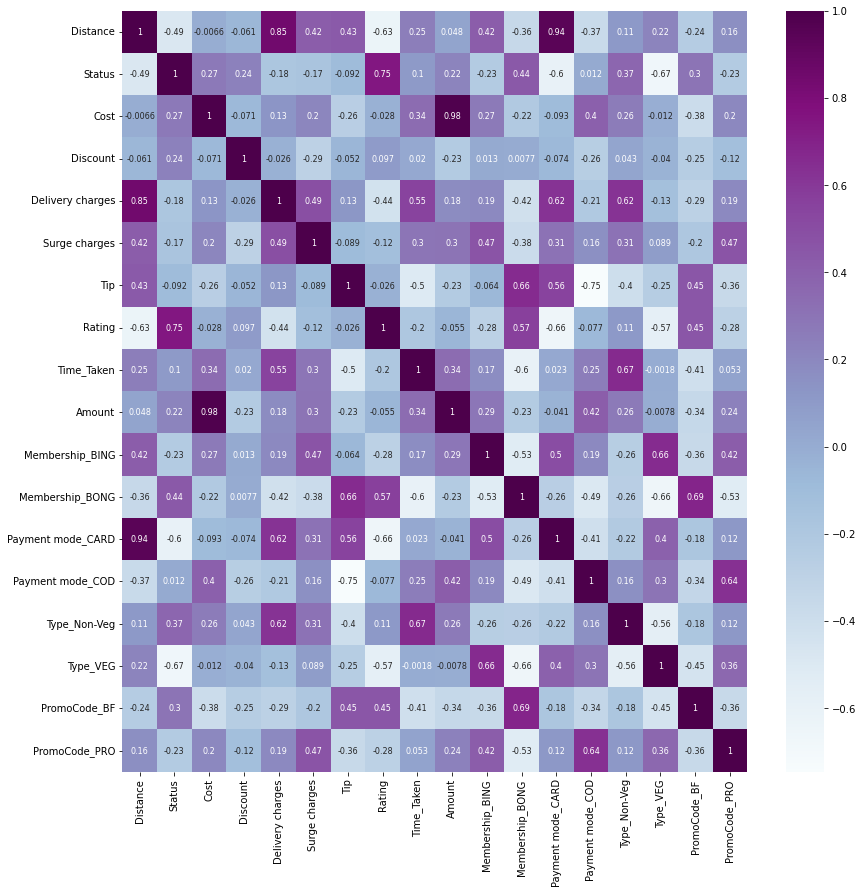

In [53]:
corr = dataset4.corr() # corrlation matrix

fig, ax = plt.subplots(figsize=(14,14))     

heat = sns.heatmap(corr,annot=True,annot_kws={'size':8},cmap='BuPu')

plt.show()

As per the above correlation heatmap there is high correlation between some features:<br >
1. Amount & Cost
2. Distance & Delivery charges

Since both 'Cost' & 'Delivery charges' contribute to Featuer 'Bill amount' , we can drop these two from our dataset.

In [54]:
#Dropping one of the highly correlated columns
dataset4.drop(['Delivery charges','Cost'],axis = 1, inplace = True)
dataset4.head()

,Distance,Status,Discount,Surge charges,Tip,Rating,Time_Taken,Amount,Membership_BING,Membership_BONG,Payment mode_CARD,Payment mode_COD,Type_Non-Veg,Type_VEG,PromoCode_BF,PromoCode_PRO
0,0.000000,1,1.000000,0.0,0.0,2.0,0.631579,0.347826,1,0,0,1,0,1,0,1
1,0.000000,1,0.333333,0.0,1.0,4.0,0.210526,0.095652,0,1,0,0,0,0,1,0
2,1.000000,0,0.666667,0.5,1.0,0.0,0.315789,0.339130,1,0,1,0,0,1,0,1
3,0.333333,1,0.333333,0.5,0.0,1.0,1.000000,0.895652,0,0,0,1,1,0,0,1
5,0.000000,0,0.333333,0.0,0.0,1.0,0.000000,0.130435,0,0,0,1,0,1,0,1


### Relation between each predictor and target

<AxesSubplot:xlabel='Rating', ylabel='count'>

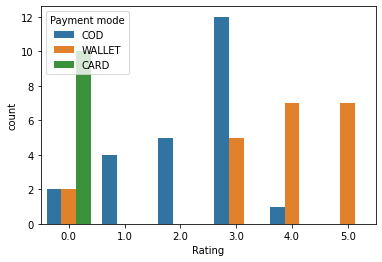

In [55]:
sns.countplot(x = 'Rating', hue = 'Payment mode',data = dataset2)

# Feature selection and Modeling

In [56]:
#Creating Input and Target variable sets
x = dataset4.drop('Rating',axis=1,inplace = False)
y = dataset4.Rating
x.head()


,Distance,Status,Discount,Surge charges,Tip,Time_Taken,Amount,Membership_BING,Membership_BONG,Payment mode_CARD,Payment mode_COD,Type_Non-Veg,Type_VEG,PromoCode_BF,PromoCode_PRO
0,0.000000,1,1.000000,0.0,0.0,0.631579,0.347826,1,0,0,1,0,1,0,1
1,0.000000,1,0.333333,0.0,1.0,0.210526,0.095652,0,1,0,0,0,0,1,0
2,1.000000,0,0.666667,0.5,1.0,0.315789,0.339130,1,0,1,0,0,1,0,1
3,0.333333,1,0.333333,0.5,0.0,1.000000,0.895652,0,0,0,1,1,0,0,1
5,0.000000,0,0.333333,0.0,0.0,0.000000,0.130435,0,0,0,1,0,1,0,1


In [57]:
#Writing Function for Backward Elimination of variable based on p-value
import statsmodels.api as sm
list_p_max = []
list_iteration =[]


def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]

        print(p_values)
        max_p_value = p_values.max()
        list_p_max.append(max_p_value)
        list_iteration.append(len(features))
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features,list_p_max,list_iteration



In [58]:
#Printing the Features selected in each iteration and corresponding p-values
feature,list_p_max,list_iteration  = backward_elimination(x, y)
print(feature)

/home/tensor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Distance             0.000098
Status               0.062137
Discount             0.178248
Surge charges        0.329791
Tip                  0.243573
Time_Taken           0.615040
Amount               0.210215
Membership_BING      0.024241
Membership_BONG      0.000146
Payment mode_CARD    0.000010
Payment mode_COD     0.045691
Type_Non-Veg         0.079473
Type_VEG             0.753334
PromoCode_BF         0.922437
PromoCode_PRO        0.683567
dtype: float64
Distance             0.000077
Status               0.055805
Discount             0.134048
Surge charges        0.324196
Tip                  0.187578
Time_Taken           0.611504
Amount               0.172476
Membership_BING      0.022717
Membership_BONG      0.000040
Payment mode_CARD    0.000007
Payment mode_COD     0.043406
Type_Non-Veg         0.076391
Type_VEG             0.755902
PromoCode_PRO        0.680523
dtype: float64
Distance             0.000077
Status               0.055805
Discount             0.134048
Surge char

/home/tensor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/tensor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/tensor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/tensor/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/tensor/anaconda3/lib/python3.9/site-packages/stats

#### After 10 iterations the Backward Elimination method resulted in 6 significant Features (as the p-value was less than significance level of 0.05) which can be used for model building. Below is the list of Features selected:
    -Status
    -Surge charges
    -Membership_BING
    -Membership_BONG
    -Payment mode_CARD
    -Payment mode_COD

In [59]:
#Creating a list of all significant fetures 
x = x[feature]

In [60]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 60)
x_train.head()

,Status,Surge charges,Membership_BING,Membership_BONG,Payment mode_CARD,Payment mode_COD
48,1,1.0,0,1,0,0
51,0,1.0,1,0,0,1
28,0,0.0,0,0,0,1
12,1,0.0,0,1,0,0
13,0,0.5,1,0,1,0


### Building and Evaluating the Linear Regression Model

In [61]:
#Importing Linear Regression function
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
model = LinearRegression()
# fitting the training data
model.fit(x_train,y_train)

LinearRegression()

In [62]:
#Predicting the test set results
y_predict =  model.predict(x_test)
y_predict

array([ 4.0141603 ,  0.36935355,  2.153798  ,  0.61992347, -0.05276479,
        2.63295614,  4.0141603 ,  2.36543663,  3.30134754,  3.47719282,
        2.36543663])

In [63]:
import sklearn.metrics as metrics  # To calculate the R Square , MSE & RMSE error

In [64]:
#Evaluating the model using R-Square, MeanSquareError and RootMeanSquareError scores
mse = metrics.mean_squared_error(y_test, y_predict)

print( 'MSE = ',mse)

rmse = np.sqrt(mse) # or mse**(0.5) 
print('RMSE = ', rmse)
r2 = metrics.r2_score(y_test,y_predict)
print('R Square error = ', r2)

MSE =  0.23072585883954416
RMSE =  0.48033931635828453
R Square error =  0.8973609230897617


Thus, we have achieved a descent score of 89.7% for our Model. This suggests a good accuracy of the Model

### Comparison of Model Parameters with Observations in EDA

  As suggested during the EDA, the Customer ratings are highly dependent on below parameters:
    
    -Status --> Customers give a good rating if the Status of the Order is "Delivered"
    -Surge charges --> Higher ratings can be seen more often for the orders where surge charges are lower
    -Membership_BING --> Those customers who are members of BING group are not giving good Ratings
    -Membership_BONG -->Customers of BONG group are giving better ratings than BING group
    -Payment mode_CARD -->Those who are not paying by Card have given good ratings
    -Payment mode_COD -->Those who are paying by CashOnDelivery(COD) method are giving good ratings

<AxesSubplot:xlabel='Rating', ylabel='count'>

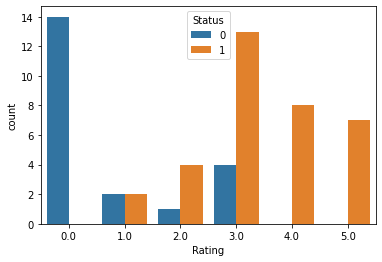

In [71]:
import seaborn as sns
sns.countplot(x = 'Rating', hue = 'Status',data = dataset2)

Status --> Customers give a good rating if the Status of the Order is "Delivered"

<AxesSubplot:xlabel='Rating', ylabel='count'>

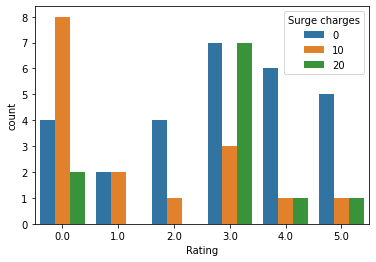

In [72]:
sns.countplot(x = 'Rating', hue = 'Surge charges',data = dataset2)

-Surge charges --> Higher ratings can be seen more often for the orders where surge charges are lower

<AxesSubplot:xlabel='Rating', ylabel='count'>

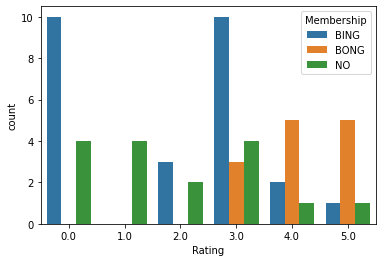

In [73]:
sns.countplot(x = 'Rating', hue = 'Membership',data = dataset2)


-Membership-->Customers of BONG group are giving better ratings than BING group

<AxesSubplot:xlabel='Rating', ylabel='count'>

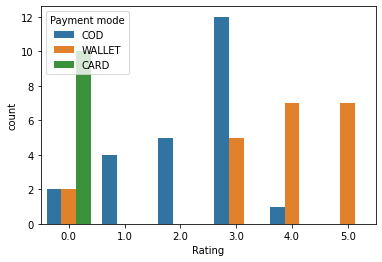

In [74]:
sns.countplot(x = 'Rating', hue = 'Payment mode',data = dataset2)

-Payment mode -->Those who are paying by WALLET mode are giving good ratings & Those who are paying by CARD mode are giving poor rating